In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importar información de las ciudades
ciudades = pd.read_csv('./data/Question_2_data/question_2_part1.csv')

#Importar información de los pedidos
ordenes = pd.read_csv('./data/Question_2_data/question_2.csv')


In [2]:
#Convertir la columna 'created_at' a tipo datetime
ordenes['created_at'] = pd.to_datetime(ordenes['created_at'])

#Crear un diccionario con los intervalos de tiempo para cada ciudad
city_intervals = dict(zip(ciudades['city_address_id'], ciudades.apply(lambda row: (pd.to_datetime(row['starts_at'], format='%H:%M:%S').time(), pd.to_datetime(row['ends_at'], format='%H:%M:%S').time()), axis=1)))

#Función para verificar si una orden viola las restricciones de la ciudad
def is_order_violating_restriction(order):
    city_id = order['city_address_id']
    start_time, end_time = city_intervals.get(city_id, (None, None))
    if start_time and end_time:
        order_time = order['created_at'].time()
        if start_time <= end_time:
            return not (start_time <= order_time <= end_time)
        else:
            return order_time < start_time and order_time > end_time
    return False

#Aplicar la función para encontrar las órdenes que violan las restricciones
violating_orders = ordenes[ordenes.apply(is_order_violating_restriction, axis=1)]

#Imprimir las órdenes que violan las restricciones
columns_to_display = ['store_id', 'order_id', 'created_at', 'city_address_id']
print(violating_orders[columns_to_display])


         store_id    order_id          created_at  city_address_id
26      450123655  1084998940 2023-10-07 00:04:43                3
28      450080973  1085002181 2023-10-07 02:02:54                5
38      450080954  1085002182 2023-10-07 02:03:00                5
54      450064872  1085002396 2023-10-07 02:14:39                5
58      450138238  1085003345 2023-10-07 03:21:23                5
...           ...         ...                 ...              ...
117590  450088453  1085165817 2023-10-08 02:05:53                5
117608  450137839  1085166485 2023-10-08 02:41:07                5
117772  450064728  1085166134 2023-10-08 02:21:24                2
117773  450080952  1085166161 2023-10-08 02:22:45                5
117774  450064728  1085166184 2023-10-08 02:24:08                2

[2953 rows x 4 columns]


In [3]:
orders_ids = violating_orders['order_id'].unique()
print(orders_ids)

In [4]:
len(orders_ids)

2653

/tmp/ipykernel_2912/3518200302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_address_id', y='order_count', data=order_counts, palette=sns.color_palette(colores_personalizados))


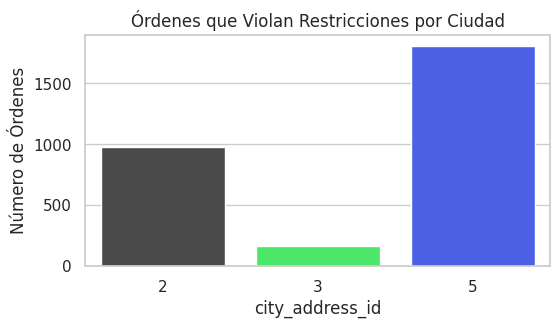

In [5]:
#Contar las órdenes por city_address_id
order_counts = violating_orders['city_address_id'].value_counts().reset_index()
order_counts.columns = ['city_address_id', 'order_count']

colores_personalizados = ["#4A4A4A01", "#33FF57", "#334DFF"]
#Graficar los resultados
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.barplot(x='city_address_id', y='order_count', data=order_counts, palette=sns.color_palette(colores_personalizados))
plt.xlabel('city_address_id')
plt.ylabel('Número de Órdenes')
plt.title('Órdenes que Violan Restricciones por Ciudad')
plt.show()

In [6]:
order_counts

,city_address_id,order_count
0,5,1808
1,2,979
2,3,166
